# Prostý krut

Vypracoval: Filip Horák, 2017/2018

U prutů dle obrázku určete bezpečnost vůči meznímu stavu pružnosti a natočení v bodě A.

## Řešení

Ze začátku je nutné naimportovat potřebné knihovny.

In [1]:
import sympy as sp
from IPython.core.display import Image
sp.init_printing()

Vyvoláme obrázek úlohy.

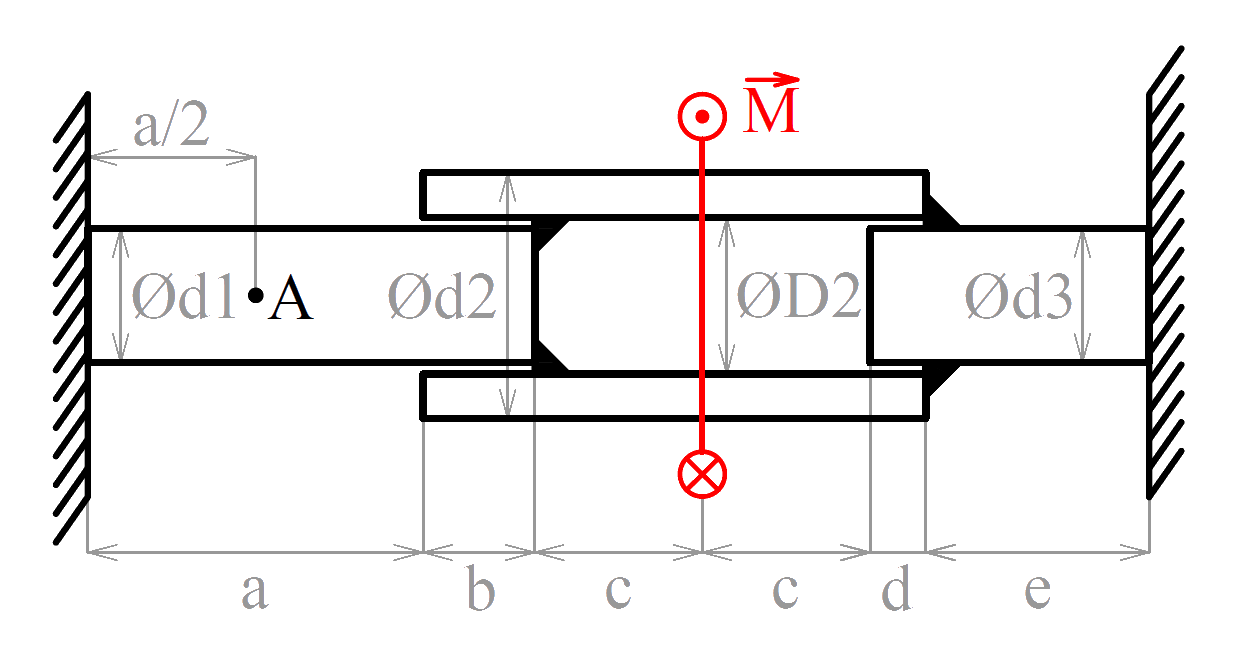

In [2]:
Image(filename='07-k-soustava-1.png', width=650)

Částečně uvolníme a sestavíme deformační podmínku:
$$\varphi^{1,2}_B = \varphi^{3}_B$$

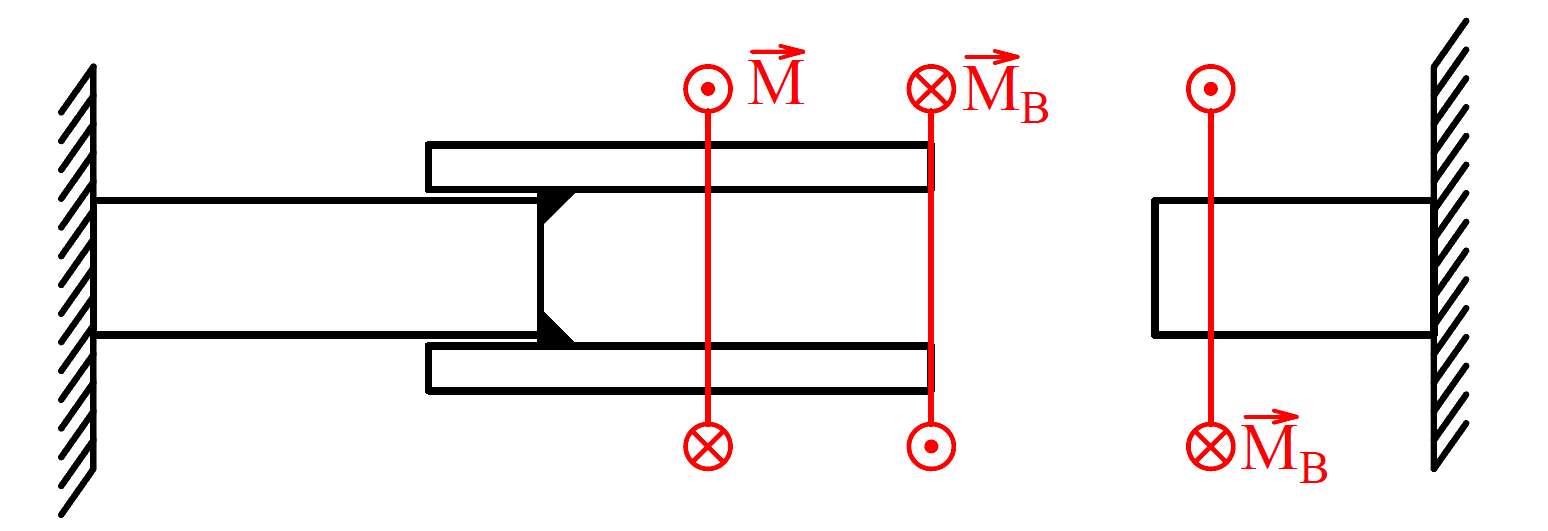

In [3]:
Image(filename='07-k-soustava-2.png', width=650)

Zavedeme potřebné proměnné jako symboly.

In [4]:
a,b,c,d,e,x=sp.symbols('a b c d e x')
d1,d2,D2,d3=sp.symbols('d_1 d_2 D_2 d_3')
G=sp.symbols('G')
M,MB=sp.symbols('M M_B')
x1,x2,x3,x4=sp.symbols('x1 x2 x3 x4')

Vyjádříme momentové vnitřní účiny jednotlivých úseků.

In [5]:
Mk1=-MB
Mk2=M-MB
Mk3=M-MB
Mk4=-MB
Mk1,Mk2,Mk3,Mk4

Vyjádříme polární momenty jednotlivých průřezů.

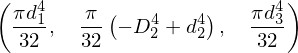

In [6]:
Jp1=sp.pi*d1**4/32
Jp2=sp.pi*(d2**4-D2**4)/32
Jp3=sp.pi*d3**4/32
Jp1,Jp2,Jp3

Vyjádříme potenciální energie těles 1,2 $W_{1,2}$ a tělesa 3 $W_3$.

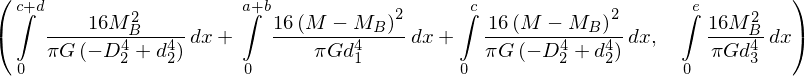

In [7]:
dW1=Mk1**2/2/G/Jp2
dW2=Mk2**2/2/G/Jp2
dW3=Mk3**2/2/G/Jp1
dW4=Mk4**2/2/G/Jp3
W12=sp.Integral(dW1,[x,0,c+d])+sp.Integral(dW2,[x,0,c])+sp.Integral(dW3,[x,0,a+b])
W3=sp.Integral(dW4,[x,0,e])
W12,W3

Vyjádříme parciální derivace energií napjatosti $W_{1,2}$ a $W_3$ podle momentu $M_B$.

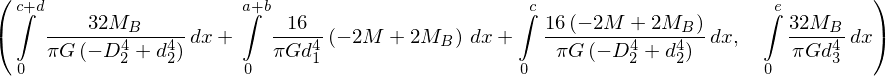

In [8]:
dW12=W12.diff(MB)
dW3=W3.diff(MB)
dW12,dW3

Sestavíme deformační podmínku:
$$-\frac{\partial W_{1,2}}{\partial M_B} = \frac{\partial W_{3}}{\partial M_B}$$

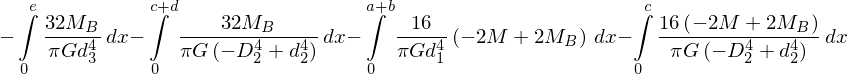

In [9]:
eqn=-dW3-dW12
eqn

Rovnice zintegrujeme a vyjádříme $M_B$.

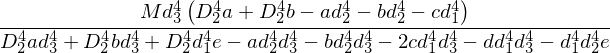

In [10]:
eqn_=eqn.doit()
sol=sp.solve([eqn_],[MB])
MB_solved=sol[MB]
MB_solved

Zavedeme číselné hodnoty veličin:
$$\begin{align}
a & = 40\, \mathrm{mm} \\
b & = 10\, \mathrm{mm} \\
c & = 20\, \mathrm{mm} \\
d & = 30\, \mathrm{mm} \\
e & = 25\, \mathrm{mm} \\
d_1 = D_2 = d_3 & = 30\, \mathrm{mm} \\
d_2 & = 40\, \mathrm{mm} \\
R_2 & = 2,5\, \mathrm{mm} \\
d_3 & = 7\, \mathrm{mm} \\
M & = 150000\, \mathrm{Nmm} \\
E & = 2.1\cdot 10^5\, \mathrm{MPa} \\
\mu & = 0,3 \\
G & = \frac{E}{2(1+\mu)} \approx 80769\, \mathrm{MPa}\\
\sigma_K & = 350\, \mathrm{MPa}\\
\tau_K & = \frac{\sigma_K}{2} = 175\, \mathrm{MPa}\\
\end{align}$$

In [11]:
a_=150.
b_=20.
c_=70.
d_=50.
e_=120.
d1_=d3_=D2_=20.
d2_=25.
M_=650000.
E_=2.1e5
u_=0.3
G=E_/(2*(1+u_))
sigma_k=350.
tau_k=sigma_k/2

Dosadíme hodnoty do rovnice $M_B$ a získáme jeho hodnotu v [Nmm].

In [12]:
MB_=MB_solved.subs({a:a_,b:b_,c:c_,d:d_,e:e_,d1:d1_,d2:d2_,D2:D2_,d3:d3_,M:M_})
sp.N(MB_,9)

Vyjádříme číselné hodnoty vnitřních účinků jednotlivých úseků.

In [13]:
Mk1_=Mk1.subs({a:a_,b:b_,c:c_,d:d_,e:e_,d1:d1_,d2:d2_,D2:D2_,d3:d3_,M:M_,MB:MB_})
Mk2_=Mk2.subs({a:a_,b:b_,c:c_,d:d_,e:e_,d1:d1_,d2:d2_,D2:D2_,d3:d3_,M:M_,MB:MB_})
Mk3_=Mk3.subs({a:a_,b:b_,c:c_,d:d_,e:e_,d1:d1_,d2:d2_,D2:D2_,d3:d3_,M:M_,MB:MB_})
Mk4_=Mk4.subs({a:a_,b:b_,c:c_,d:d_,e:e_,d1:d1_,d2:d2_,D2:D2_,d3:d3_,M:M_,MB:MB_})
sp.N(Mk1_,9),sp.N(Mk2_,9),sp.N(Mk3_,9),sp.N(Mk4_,9)

Spočtemé smykové napětí jednotlivých úseků.

In [14]:
tau1=(Mk1_/Jp1.subs({d1:d1_}))*(d1_/2)
tau2=(Mk2_/Jp2.subs({d2:d2_,D2:D2_}))*(D2_/2)
tau3=(Mk3_/Jp2.subs({d2:d2_,D2:D2_}))*(D2_/2)
tau4=(Mk4_/Jp3.subs({d3:d3_}))*(d3_/2)
sp.N(tau1,6),sp.N(tau2,6),sp.N(tau3,6),sp.N(tau4,6)

Spočteme bezpečnost úseku s největším smykovým napětím.

In [15]:
tau=abs(tau1),abs(tau2),abs(tau3),abs(tau4)
tau_max=float(max(tau))
Kk=sigma_k/(2*tau2)
sp.N(Kk,4)

Sestavíme rovnici pro natočení $\varphi_A$ v bodě $A$ a dosadíme číselné hodnoty. Výpočtem dostaneme natočení ve [°].
$$\varphi_A = \frac{M\frac{a}{2}}{GJ_{P1}} - \frac{M_B\frac{a}{2}}{GJ_{P1}}$$

In [16]:
fiA=-MB*(a/2)/G/Jp1+M*(a/2)/G/Jp1
fiArad=fiA.subs({a:a_,d1:d1_,M:M_,MB:MB_})
fiA_=fiArad*180/sp.pi
sp.N(fiA_,4)